In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import healpy as hp
from lsst.sims.utils import calcLmstLast, Site

In [13]:
names = ['hpid', 'M', 'G', 'R', 'B', 'airmass', 'mjd']
types = [int,float,float,float,float,float,float]
data = np.loadtxt('xy2sky.txt', dtype=zip(names,types), skiprows=1)
site = Site('LSST')

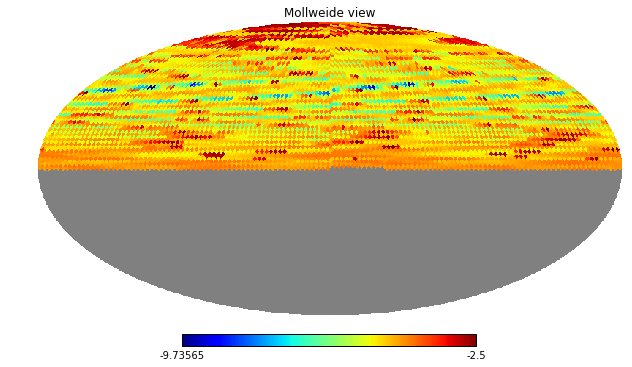

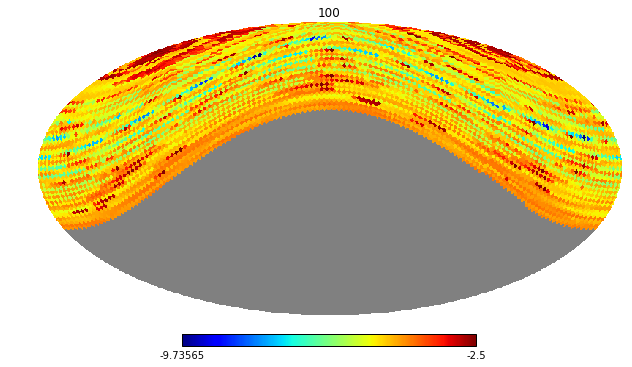

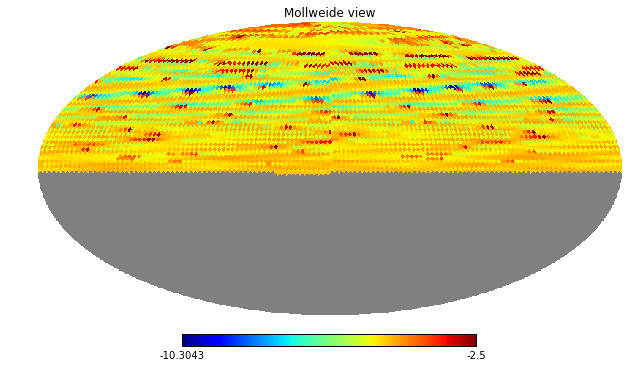

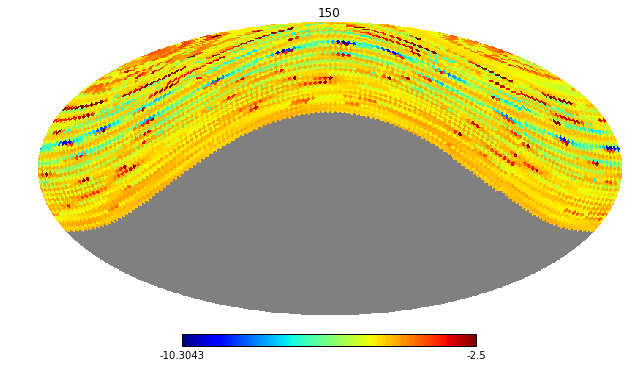

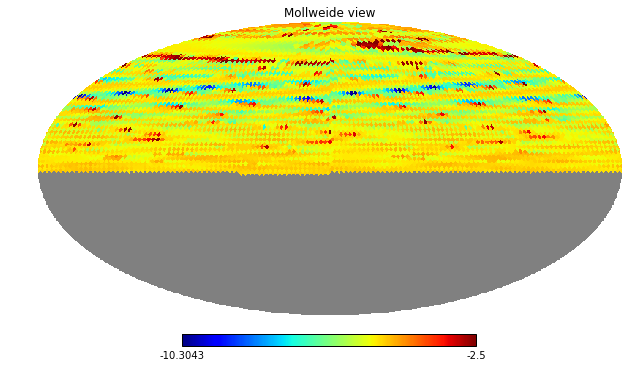

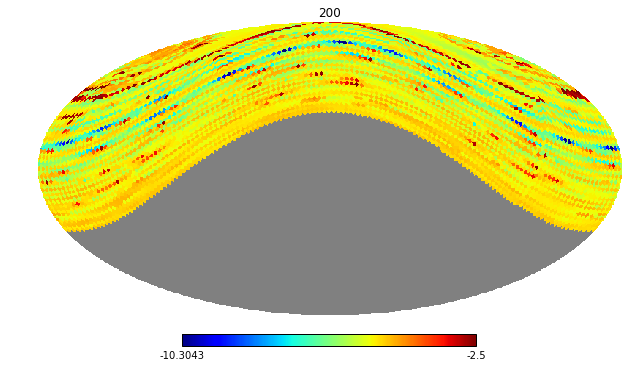

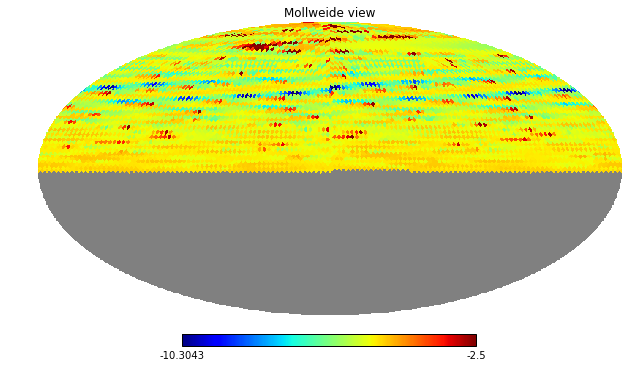

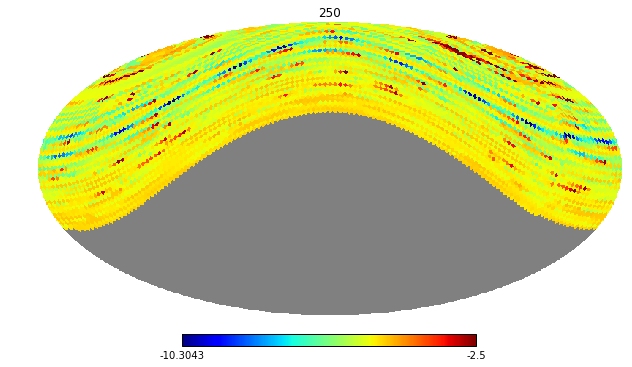

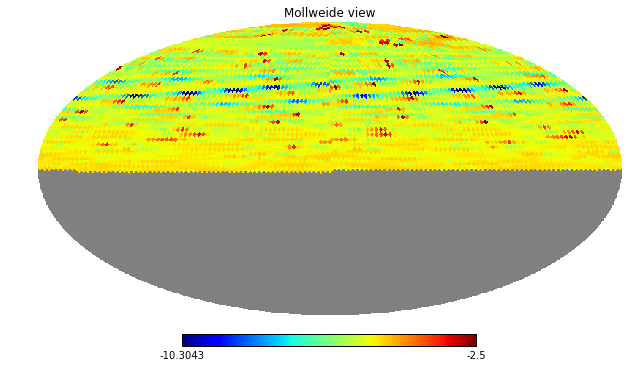

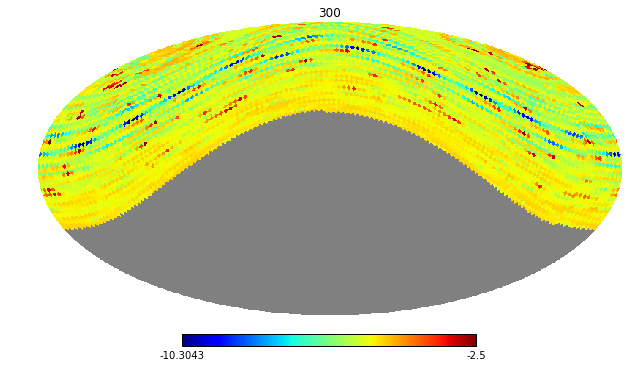

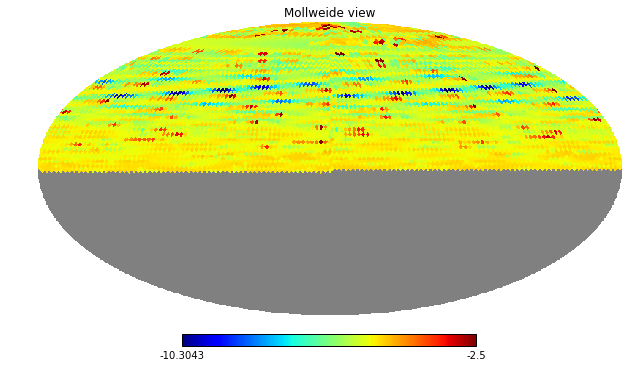

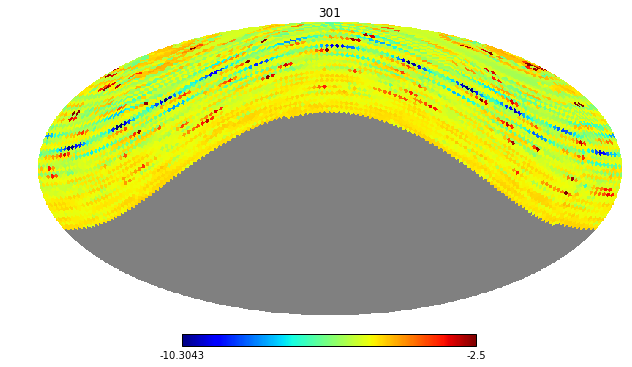

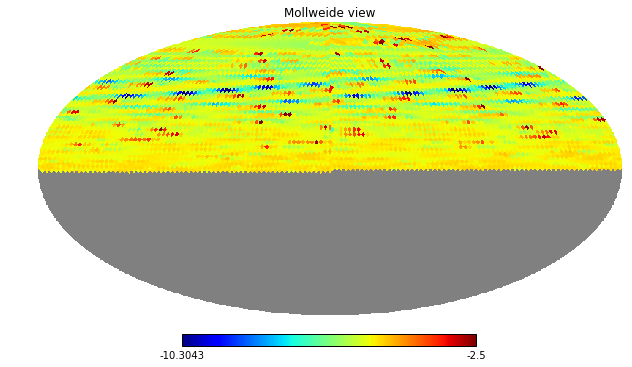

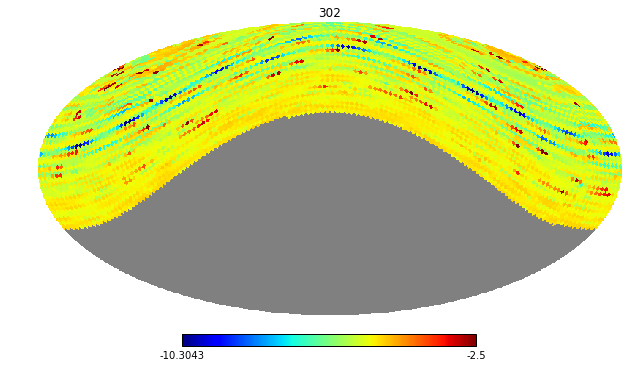

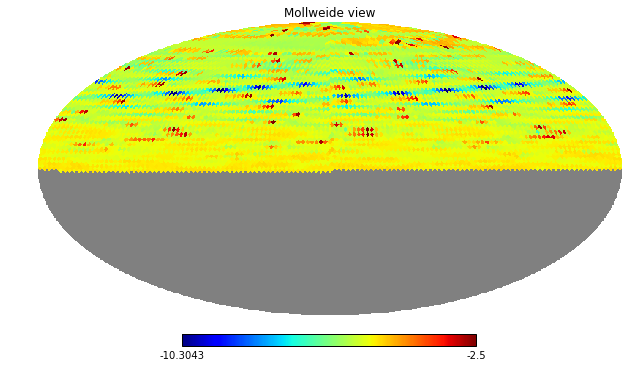

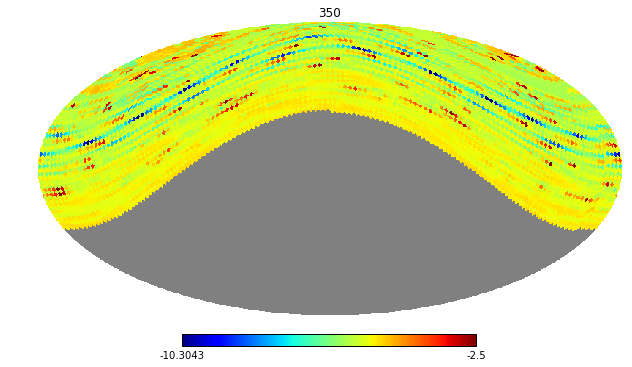

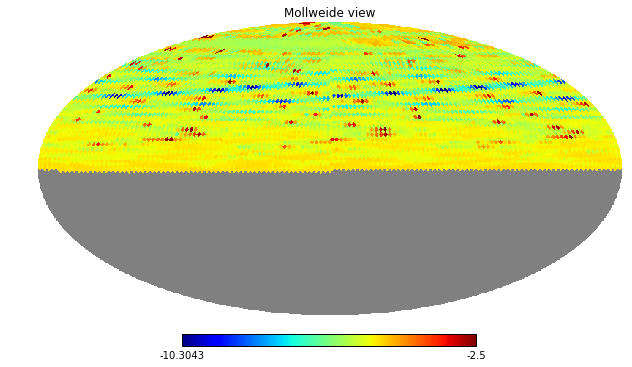

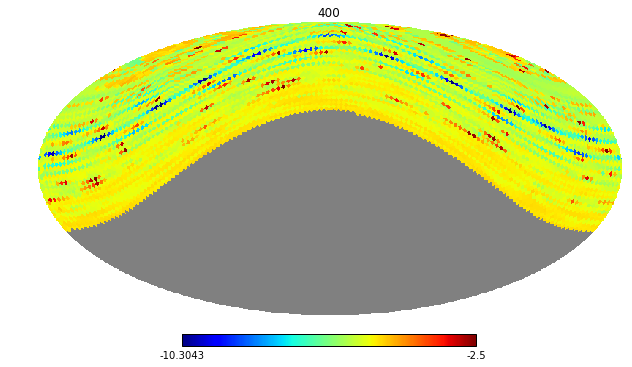

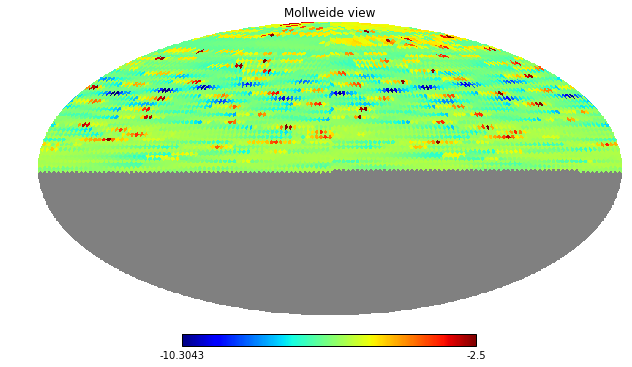

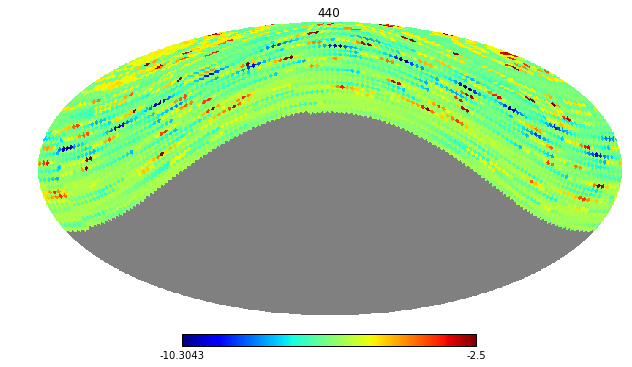

In [17]:
umjd = np.unique(data['mjd'])
nside = 32

for i in [100,150,200, 250,300, 301,302, 350, 400, 440]:
    skymap = np.zeros(hp.nside2npix(nside))+hp.UNSEEN
    good = np.where(data['mjd'] == umjd[i])
    lmst,last = calcLmstLast(umjd[i], site.longitude_rad)
    lmst = lmst*180/12.
    skymap[data['hpid'][good]] = data['M'][good]
    hp.mollview(skymap)
    hp.mollview(skymap, rot=(lmst,site.latitude,0), title=str(i))

In [12]:
data['mjd']

array(['5', '5', '5', ..., '5', '5', '5'], 
      dtype='|S1')